In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import RFE, SelectFromModel
import matplotlib.pyplot as plt

In [3]:
testSize = 0.25
numberOfLayers = 4
k = 5

In [80]:
RFC = RandomForestClassifier()
NNC = MLPClassifier(hidden_layer_sizes=(numberOfLayers,),activation='relu') 

models = [("Neural Network",NNC,RFE(NNC)),
         ("Random Forest",RFC,SelectFromModel(RFC))]

In [81]:
X = pd.read_csv("../binary/X.csv",header=None).values
y = pd.read_csv("../binary/y.csv",header=None,squeeze=True).values
waveLengths = pd.read_csv("../binary/Wavelength.csv",header=None)
X_toClassify = pd.read_csv("../binary/XToClassify.csv",header=None).values
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
results = pd.DataFrame()

# X_train.shape

In [88]:
for name, model, selector in models:
    print(name)
    scores = cross_validate(NNC,X_train,y_train,cv=k,scoring='f1')
    selector.fit(X_train,y_train)
    results = pd.Series({
        "f1":scores['test_score'],
        "operation time" : scores['fit_time']+scores['score_time'],
        "Number of important features":selector.support_ 
    })
    print( pd.Series({
        "f1":scores['test_score'],
        "operation time" : scores['fit_time']+scores['score_time'],
        "Number of important features":selector.support_ 
    }))

print(results)

Neural Network


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [10]:
accuracy_score(y_test,NNC.predict(X_test))

1.0

In [21]:
print(classification_report(y_test,RF.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        24

avg / total       1.00      1.00      1.00        45



In [31]:
pd.DataFrame(NNC.predict(X_toClassify)).to_csv("../binary/PredictedClasses.csv",index=False)

In [49]:
print('total number of features: ', X.shape[1])


RFSelector = SelectFromModel(RF,'mean')
RF.fit(X_train,y_train)
RFSelector.fit(X_train,y_train)

# which features perform well enough to keep?
print(waveLengths[RFSelector.get_support()])


total number of features:  921
           0
199  495.126
264  519.073
281  525.310
293  529.705
382  562.129
632  651.467
670  664.811
874  735.317
880  737.361
882  738.042


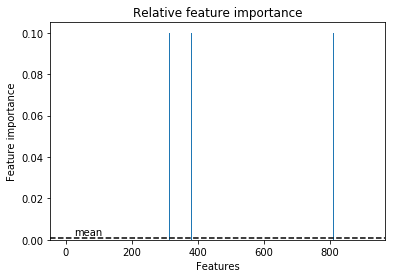

In [50]:
plt.bar(range(len(RF.feature_importances_)),RF.feature_importances_)
plt.axhline(y= RF.feature_importances_.mean(), hold=None, ls="dashed", color="black")
plt.text(x=25,y=RF.feature_importances_.mean()+0.001, s="mean", color="black")
plt.title("Relative feature importance")
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.show()

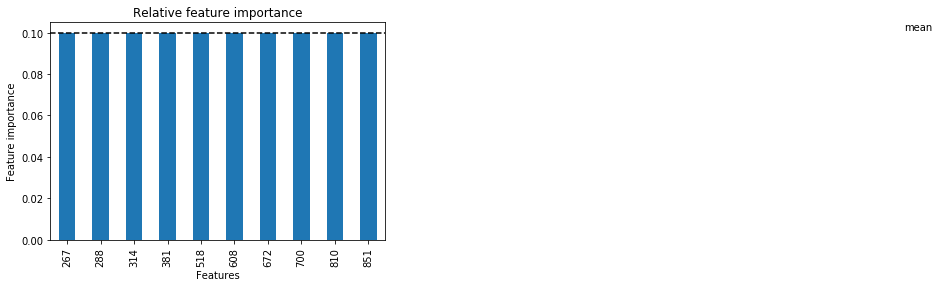

In [70]:
featImp = pd.Series(RF.feature_importances_)
feats = featImp[featImp>featImp.mean()]
feats.plot(kind='bar')
# plt.bar(feats.index,feats)
plt.axhline(y= feats.mean(), hold=None, ls="dashed", color="black")
plt.text(x=25,y=feats.mean()+0.001, s="mean", color="black")
plt.title("Relative feature importance")
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.show()

In [52]:

temp = np.partition(-RF.feature_importances_, 10)
result = -temp[:10]
print(result)

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


In [67]:
feats

267    0.1
288    0.1
314    0.1
381    0.1
518    0.1
608    0.1
672    0.1
700    0.1
810    0.1
851    0.1
dtype: float64